In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [33]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'EREGL.IS'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [34]:
data.reset_index(inplace=True)

In [35]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,2.014849,2.051706,2.008706,2.014849,0.660807,4895933
1,2012-01-03,2.063991,2.070134,2.014849,2.063991,0.676924,7142699
2,2012-01-04,2.051706,2.088563,2.039420,2.051706,0.672895,8400931
3,2012-01-05,2.051706,2.070134,2.020992,2.051706,0.672895,5196416
4,2012-01-06,2.045563,2.076277,2.002563,2.045563,0.670881,4422721
...,...,...,...,...,...,...,...
2826,2022-12-14,43.139999,43.180000,41.000000,41.020000,41.020000,129305551
2827,2022-12-15,41.900002,42.400002,40.340000,41.099998,41.099998,89263195
2828,2022-12-16,41.200001,42.200001,41.040001,41.380001,41.380001,32507008
2829,2022-12-19,40.900002,41.799999,40.799999,41.500000,41.500000,122156065


In [36]:
ma_100_days = data.Close.rolling(100).mean()

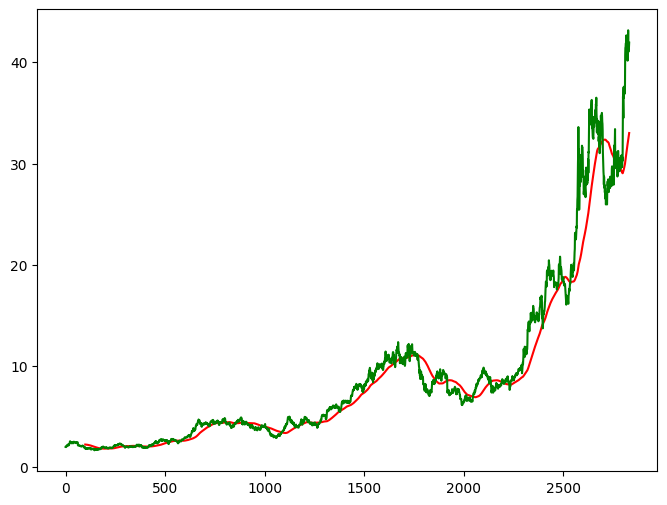

In [37]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [38]:
ma_200_days = data.Close.rolling(200).mean()

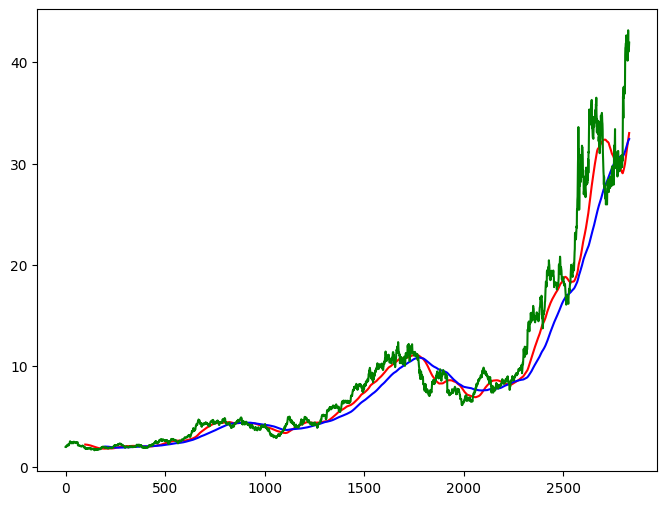

In [39]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [40]:
data.dropna(inplace=True)

In [41]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [42]:
data_train.shape[0]

2264

In [43]:
data_test.shape[0]

567

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [45]:
data_train_scale = scaler.fit_transform(data_train)

In [46]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [47]:
x, y = np.array(x), np.array(y)

In [48]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [49]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [50]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [51]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
68/68 [==============================] - 14s 156ms/step - loss: 0.0290
Epoch 2/50
68/68 [==============================] - 11s 161ms/step - loss: 0.0073
Epoch 3/50
68/68 [==============================] - 11s 157ms/step - loss: 0.0063
Epoch 4/50
68/68 [==============================] - 11s 160ms/step - loss: 0.0076
Epoch 5/50
68/68 [==============================] - 11s 160ms/step - loss: 0.0058
Epoch 6/50
68/68 [==============================] - 9s 136ms/step - loss: 0.0051
Epoch 7/50
68/68 [==============================] - 11s 157ms/step - loss: 0.0059
Epoch 8/50
68/68 [==============================] - 11s 158ms/step - loss: 0.0045
Epoch 9/50
68/68 [==============================] - 11s 160ms/step - loss: 0.0043
Epoch 10/50
68/68 [==============================] - 11s 159ms/step - loss: 0.0042
Epoch 11/50
68/68 [==============================] - 11s 162ms/step - loss: 0.0042
Epoch 12/50
68/68 [==============================] - 11s 163ms/step - loss: 0.0039
Epoch 13/50
68

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [53]:
pas_100_days = data_train.tail(100)

In [54]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [55]:
data_test_scale  =  scaler.fit_transform(data_test)

In [56]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [57]:
y_predict = model.predict(x)

18/18 [==============================] - 1s 44ms/step


In [58]:
scale =1/scaler.scale_

In [59]:
y_predict = y_predict*scale

In [60]:
y = y*scale

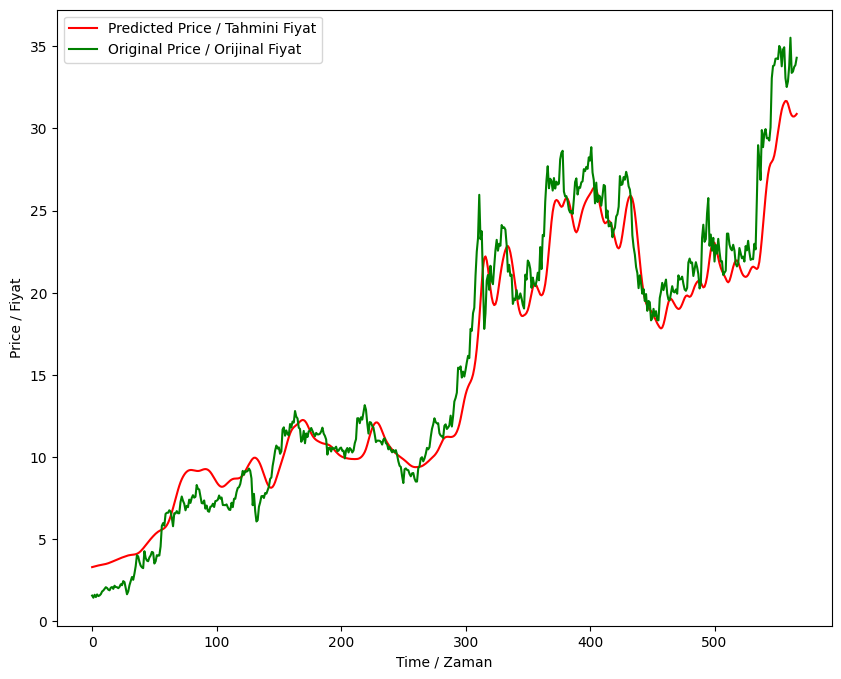

In [61]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price / Tahmini Fiyat')
plt.plot(y, 'g', label = 'Original Price / Orijinal Fiyat')
plt.xlabel('Time / Zaman')
plt.ylabel('Price / Fiyat')
plt.legend()
plt.show()

In [62]:
model.save('Stock Predictions Model.keras')